In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [2]:
raw_df=pd.read_csv("C://Users/cmejri/Downloads/CC_GENERAL.csv")

In [5]:
raw_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
raw_df['MINIMUM_PAYMENTS']=raw_df.MINIMUM_PAYMENTS.fillna(raw_df['MINIMUM_PAYMENTS'].mean())
raw_df['CREDIT_LIMIT']=raw_df.CREDIT_LIMIT.fillna(raw_df['CREDIT_LIMIT'].mean())

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
raw_df = raw_df.drop('CUST_ID', axis = 1) 

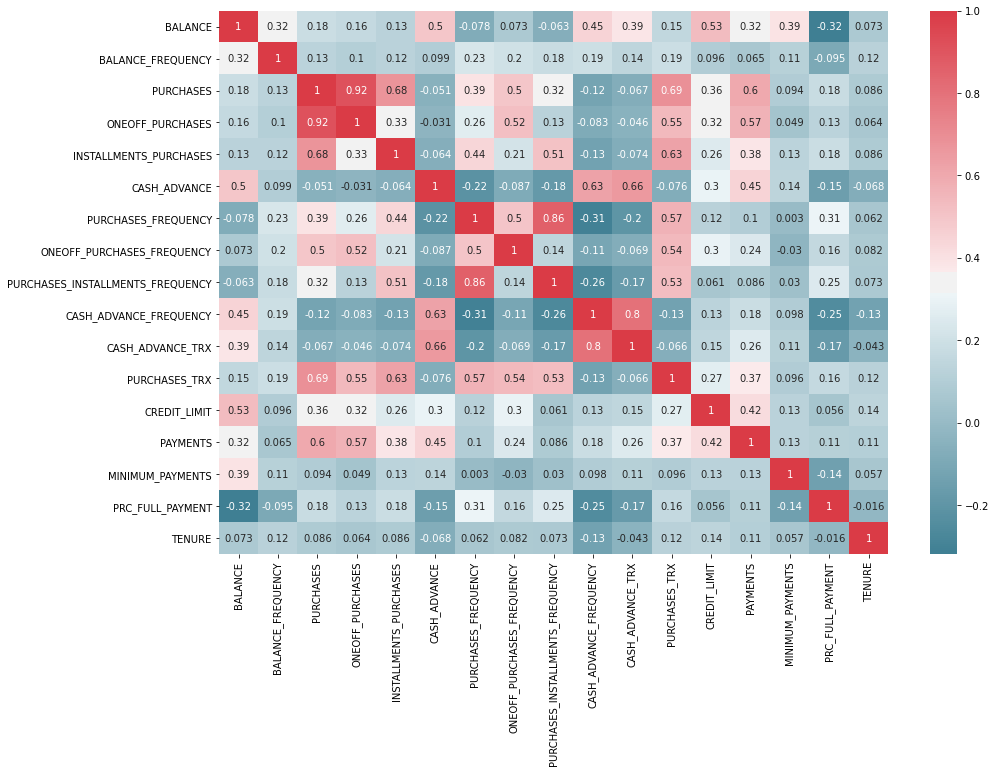

In [14]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df1.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(raw_df)

#Hierarchical clustering

In [5]:
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(raw_df)

In [6]:
agglomerative=pd.DataFrame(clust_labels)

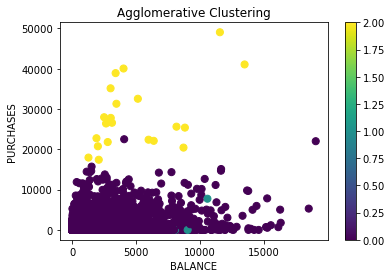

In [7]:
fig=plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(raw_df['BALANCE'], raw_df['PURCHASES'], c=agglomerative[0], s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('BALANCE')
ax.set_ylabel('PURCHASES')
plt.colorbar(scatter)

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Dendograms')
dend=shc.dendrogram(shc.linkage(raw_df, method='complete'))

KMeans

In [10]:
sum_squared_distance=[]
K= range (1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(raw_df)
    sum_squared_distance.append(km.inertia_)

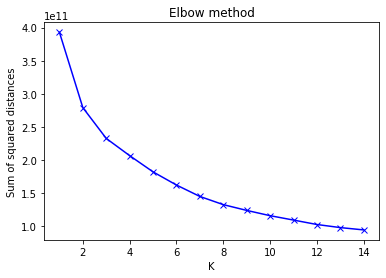

In [11]:
plt.plot(K, sum_squared_distance, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method')
plt.show()

In [12]:
kmeans=KMeans(n_clusters=3, random_state=0)
kmeans.fit(raw_df)
y_kmeans = kmeans.predict(raw_df)

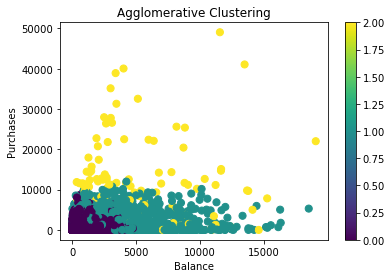

In [13]:
fig=plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(raw_df['BALANCE'], raw_df['PURCHASES'],c=y_kmeans, s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Balance')
ax.set_ylabel('Purchases')
plt.colorbar(scatter)